In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  
import seaborn as sns

# Read Data

In [3]:
# Read all data
all_data_selection = pd.read_csv('fama_french_data.csv', index_col=0, dtype={0:'str'})
all_data_selection.index = pd.to_datetime(all_data_selection.index, format='%Y%m')
X_all = all_data_selection.iloc[:,8:]
data_index = all_data_selection.index[-360:]
#X_all = X_all.drop(columns=['wti_prev_yoy_chg'])
y_SMB_bin = all_data_selection['SMB_bin'][-360:]
y_HML_bin = all_data_selection['HML_bin'][-360:]
y_SMB_HML = np.where((all_data_selection['SMB'] - all_data_selection['HML']) >= 0, 1, 0)[-360:]
y_SMB_ret = all_data_selection['SMB'][-360:]
y_HML_ret = all_data_selection['HML'][-360:]

In [4]:
# Read predictions
RegL2_all = pd.read_csv('../Results/Regression_L2_30yr_400window.csv', index_col=0, dtype={0:'str'})
GRU_all = pd.read_csv('../Results/GRU_12_30yr_400window.csv', index_col=0, dtype={0:'str'})
GB_SMB = pd.read_csv('../Results/GradientBoosting_SMB_30yr.csv', index_col=0, dtype={0:'str'})
GB_SMB.columns = ['SMB']
GB_HML = pd.read_csv('../Results/GradientBoosting_HML_30yr.csv', index_col=0, dtype={0:'str'})
GB_HML.columns = ['HML']
GB_SMBHML = pd.read_csv('../Results/GradientBoosting_SMBHML_30yr.csv', index_col=0, dtype={0:'str'})
GB_SMBHML.columns = ['SMBHML']


In [5]:
RF_SMB = pd.read_csv('../Results/SMB_bin_RF.csv', index_col=0, dtype={0:'str'})
RF_SMB.columns = ['SMB']
RF_SMB = RF_SMB.iloc[-360:,]
RF_HML = pd.read_csv('../Results/HML_bin_RF.csv', index_col=0, dtype={0:'str'})
RF_HML.columns = ['HML']
RF_HML = RF_HML.iloc[-360:,]
RF_SMBHML = pd.read_csv('../Results/SMB_over_HML_RF.csv', index_col=0, dtype={0:'str'})
RF_SMBHML.columns = ['SMBHML']
RF_SMBHML = RF_SMBHML.iloc[-360:,]


In [6]:
SVM_SMB = pd.read_csv('../Results/SMB_bin_SVM.csv', index_col=0, dtype={0:'str'})
SVM_SMB.columns = ['SMB']
SVM_SMB = SVM_SMB.iloc[-360:,]
SVM_HML = pd.read_csv('../Results/HML_bin_SVM.csv', index_col=0, dtype={0:'str'})
SVM_HML.columns = ['HML']
SVM_HML = SVM_HML.iloc[-360:,]
SVM_SMBHML = pd.read_csv('../Results/SMB_over_HML_SVM.csv', index_col=0, dtype={0:'str'})
SVM_SMBHML.columns = ['SMBHML']
SVM_SMBHML = SVM_SMBHML.iloc[-360:,]

In [7]:
RegL2_SMB = pd.DataFrame(RegL2_all['SMB'])
RegL2_HML = pd.DataFrame(RegL2_all['HML'])
RegL2_SMBHML = pd.DataFrame(RegL2_all['SMBHML'])

GRU_SMB = pd.DataFrame(GRU_all['SMB'])
GRU_HML = pd.DataFrame(GRU_all['HML'])
GRU_SMBHML = pd.DataFrame(GRU_all['SMBHML'])

In [8]:
# Map to accuracies
acc_col = ['RegL2_SMB','RegL2_HML','RegL2_SMBHML', 
           'RF_SMB','RF_HML','RF_SMBHML',
           'GRU_SMB','GRU_HML','GRU_SMBHML']
acc_df = pd.DataFrame(columns=acc_col, index=data_index)

In [9]:
acc_df['RegL2_SMB'] = np.where(np.array(RegL2_SMB).flatten()==y_SMB_bin, 1, 0)
acc_df['RF_SMB'] = np.where(np.array(RF_SMB).flatten()==y_SMB_bin, 1, 0)
acc_df['GRU_SMB'] = np.where(np.array(GRU_SMB).flatten()==y_SMB_bin, 1, 0)

acc_df['RegL2_HML'] = np.where(np.array(RegL2_HML).flatten()==y_HML_bin, 1, 0)
acc_df['RF_HML'] = np.where(np.array(RF_HML).flatten()==y_HML_bin, 1, 0)
acc_df['GRU_HML'] = np.where(np.array(GRU_HML).flatten()==y_HML_bin, 1, 0)

acc_df['RegL2_SMBHML'] = np.where(np.array(RegL2_SMBHML).flatten()==y_SMB_HML, 1, 0)
acc_df['RF_SMBHML'] = np.where(np.array(RF_SMBHML).flatten()==y_SMB_HML, 1, 0)
acc_df['GRU_SMBHML'] = np.where(np.array(GRU_SMBHML).flatten()==y_SMB_HML, 1, 0)

In [10]:
# import returns
ret_df = pd.read_csv('../Results/Summary/monthly_returns.csv', index_col=0, dtype={0:'str'})
ret_df.index = data_index
ret_df['Equal_Weight'] = 0.5*(ret_df['SMB']+ret_df['HML'])
ret_df = ret_df[['SMB','HML','Equal_Weight',
                 'Regression L2_SMB_return','Regression L2_HML_return','Regression L2_SMB_or_HML_return',
                 'RF_SMB_return','RF_HML_return','RF_SMB_or_HML_return',
                 'GRU_12_SMB_return','GRU_12_HML_return','GRU_12_SMB_or_HML_return',]]

In [11]:
# Map to returns
ret_col = ['SMB_passive','HML_passive','Equal_Weight',
           'RegL2_SMB','RegL2_HML','RegL2_SMBHML', 
           'RF_SMB','RF_HML','RF_SMBHML',
           'GRU_SMB','GRU_HML','GRU_SMBHML']
ret_df = pd.DataFrame(columns=ret_col, index=data_index)

In [12]:
ret_df['RegL2_SMB'] = np.where(np.array(RegL2_SMB).flatten()==1, y_SMB_ret, -y_SMB_ret)
ret_df['RF_SMB'] = np.where(np.array(RF_SMB).flatten()==1, y_SMB_ret, -y_SMB_ret)
ret_df['GRU_SMB'] = np.where(np.array(GRU_SMB).flatten()==1, y_SMB_ret, -y_SMB_ret)

ret_df['RegL2_HML'] = np.where(np.array(RegL2_HML).flatten()==1, y_HML_ret, -y_HML_ret)
ret_df['RF_HML'] = np.where(np.array(RF_HML).flatten()==1, y_HML_ret, -y_HML_ret)
ret_df['GRU_HML'] = np.where(np.array(GRU_HML).flatten()==1, y_HML_ret, -y_HML_ret)

ret_df['RegL2_SMBHML'] = np.where(np.array(RegL2_SMBHML).flatten()==1, y_SMB_ret, y_HML_ret)
ret_df['RF_SMBHML'] = np.where(np.array(RF_SMBHML).flatten()==1, y_SMB_ret, y_HML_ret)
ret_df['GRU_SMBHML'] = np.where(np.array(GRU_SMBHML).flatten()==1, y_SMB_ret, y_HML_ret)

ret_df['SMB_passive'] = y_SMB_ret
ret_df['HML_passive'] = y_HML_ret
ret_df['Equal_Weight'] = 0.5 * (y_SMB_ret + y_HML_ret)

# Return - overal mean, sd, cumulative

In [13]:
SMB_ret_col = ['SMB_passive','RegL2_SMB','RF_SMB','GRU_SMB']
HML_ret_col = ['HML_passive','RegL2_HML','RF_HML','GRU_HML']
SMBHML_ret_col = ['Equal_Weight','RegL2_SMBHML','RF_SMBHML','GRU_SMBHML']
summary_col = ['Passive','Regression','Random Forest','GRU']

In [14]:
ret_df_SMB = ret_df[SMB_ret_col]
ret_sum_SMB = pd.DataFrame(index=['Mean','Standard Deviation','Cummulative'], columns=SMB_ret_col)
ret_sum_SMB.loc['Mean',:] = ret_df_SMB.agg(np.mean)
ret_sum_SMB.loc['Standard Deviation',:] = ret_df_SMB.agg(np.std)
ret_sum_SMB.loc['Cummulative',:] = ret_df_SMB.apply(lambda x: (x+1).prod())
ret_sum_SMB

,SMB_passive,RegL2_SMB,RF_SMB,GRU_SMB
Mean,0.00105611,0.00263833,0.00215111,0.00352111
Standard Deviation,0.0314937,0.0314008,0.0314379,0.0313141
Cummulative,1.22601,2.14853,1.8029,2.96222


In [15]:
ret_df_HML = ret_df[HML_ret_col]
ret_sum_HML = pd.DataFrame(index=['Mean','Standard Deviation','Cummulative'], columns=HML_ret_col)
ret_sum_HML.loc['Mean',:] = ret_df_HML.agg(np.mean)
ret_sum_HML.loc['Standard Deviation',:] = ret_df_HML.agg(np.std)
ret_sum_HML.loc['Cummulative',:] = ret_df_HML.apply(lambda x: (x+1).prod())
ret_sum_HML

,HML_passive,RegL2_HML,RF_HML,GRU_HML
Mean,0.00152278,0.00173833,0.00450167,-0.000172222
Standard Deviation,0.0292048,0.0291928,0.0288959,0.029244
Cummulative,1.48452,1.6035,4.33856,0.803711


In [16]:
ret_df_SMBHML = ret_df[SMBHML_ret_col]
ret_sum_SMBHML = pd.DataFrame(index=['Mean','Standard Deviation','Cummulative'], columns=SMBHML_ret_col)
ret_sum_SMBHML.loc['Mean',:] = ret_df_SMBHML.agg(np.mean)
ret_sum_SMBHML.loc['Standard Deviation',:] = ret_df_SMBHML.agg(np.std)
ret_sum_SMBHML.loc['Cummulative',:] = ret_df_SMBHML.apply(lambda x: (x+1).prod())
ret_sum_SMBHML

,Equal_Weight,RegL2_SMBHML,RF_SMBHML,GRU_SMBHML
Mean,0.00128944,0.00216889,0.00152278,0.003395
Standard Deviation,0.0185221,0.0288337,0.0287606,0.0307355
Cummulative,1.4955,1.8767,1.48865,2.8685


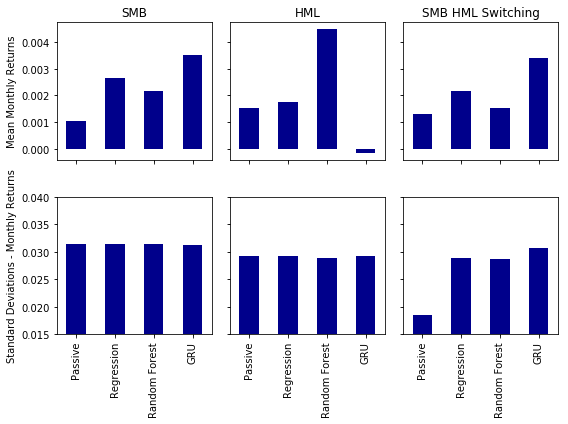

In [17]:
# total mean, cumulative, std
fig, ax = plt.subplots(2,3,figsize=(8,6), sharex=True,sharey='row')
ret_sum_SMB.T.loc[:,'Mean'].plot.bar(ax=ax[0,0],color='darkblue')
ret_sum_HML.T.loc[:,'Mean'].plot.bar(ax=ax[0,1],color='darkblue')
ret_sum_SMBHML.T.loc[:,'Mean'].plot.bar(ax=ax[0,2],color='darkblue')
ax[0,0].set_ylabel("Mean Monthly Returns")
ax[0,0].set_title("SMB")

ret_sum_SMB.T.loc[:,'Standard Deviation'].plot.bar(ax=ax[1,0],color='darkblue')
ret_sum_HML.T.loc[:,'Standard Deviation'].plot.bar(ax=ax[1,1],color='darkblue')
ret_sum_SMBHML.T.loc[:,'Standard Deviation'].plot.bar(ax=ax[1,2],color='darkblue')
ax[1,0].set_ylim(0.015, 0.04)
ax[1,0].set_ylabel('Standard Deviations - Monthly Returns')
ax[0,1].set_title("HML")


#ret_sum_SMB.T.loc[:,'Cummulative'].plot.bar(ax=ax[2,0],color='darkblue')
#ret_sum_HML.T.loc[:,'Cummulative'].plot.bar(ax=ax[2,1],color='darkblue')
#ret_sum_SMBHML.T.loc[:,'Cummulative'].plot.bar(ax=ax[2,2],color='darkblue')
#ax[2,0].set_ylabel('Cumulative Returns')
ax[0,2].set_title("SMB HML Switching")

ax[1,0].set_xticklabels(summary_col)
ax[1,1].set_xticklabels(summary_col)
ax[1,2].set_xticklabels(summary_col)
plt.tight_layout()

fig.savefig('../Results/Figures/mean_std.png', dpi=fig.dpi)

In [18]:
ret_sum_SMB_yr = ret_df_SMB.groupby(by = np.arange(len(ret_df_SMB.index))//120, axis=0).mean()
ret_sum_HML_yr = ret_df_HML.groupby(by = np.arange(len(ret_df_HML.index))//120, axis=0).mean()
ret_sum_SMBHML_yr = ret_df_SMBHML.groupby(by = np.arange(len(ret_df_SMBHML.index))//120, axis=0).mean()

In [24]:
def findcolor(x):
    color = ['darkblue','darkblue','darkblue','darkblue']
    for i in range(1,4):
        if (x[i]>x[0]):
            color[i]='green'
        else:
            color[i]='red'
    return color
            

[Text(0,0,'Passive'),
 Text(0,0,'Regression'),
 Text(0,0,'Random Forest'),
 Text(0,0,'GRU')]

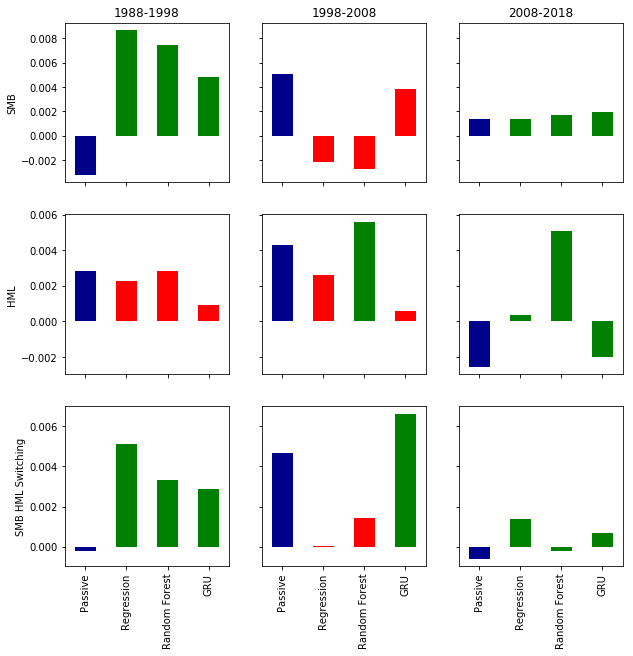

In [26]:
# mean return by time
fig, ax = plt.subplots(3,3,figsize=(10,10), sharex=True,sharey='row')
ret_sum_SMB_yr.iloc[0,:].T.plot.bar(ax=ax[0,0],color=findcolor(ret_sum_SMB_yr.iloc[0,:]))
ret_sum_HML_yr.iloc[0,:].T.plot.bar(ax=ax[1,0],color=findcolor(ret_sum_HML_yr.iloc[0,:]))
ret_sum_SMBHML_yr.iloc[0,:].T.plot.bar(ax=ax[2,0],color=findcolor(ret_sum_SMBHML_yr.iloc[0,:]))
ax[0,0].set_ylabel("SMB")
ax[0,0].set_title("1988-1998")

ret_sum_SMB_yr.iloc[1,:].plot.bar(ax=ax[0,1],color=findcolor(ret_sum_SMB_yr.iloc[1,:]))
ret_sum_HML_yr.iloc[1,:].plot.bar(ax=ax[1,1],color=findcolor(ret_sum_HML_yr.iloc[1,:]))
ret_sum_SMBHML_yr.iloc[1,:].plot.bar(ax=ax[2,1],color=findcolor(ret_sum_SMBHML_yr.iloc[1,:]))
ax[1,0].set_ylabel("HML")
ax[0,1].set_title("1998-2008")

ret_sum_SMB_yr.iloc[2,:].plot.bar(ax=ax[0,2],color=findcolor(ret_sum_SMB_yr.iloc[2,:]))
ret_sum_HML_yr.iloc[2,:].plot.bar(ax=ax[1,2],color=findcolor(ret_sum_HML_yr.iloc[2,:]))
ret_sum_SMBHML_yr.iloc[2,:].plot.bar(ax=ax[2,2],color=findcolor(ret_sum_SMBHML_yr.iloc[2,:]))

ax[2,0].set_ylabel('SMB HML Switching')
ax[0,2].set_title("2008-2018")

ax[2,0].set_xticklabels(summary_col)
ax[2,1].set_xticklabels(summary_col)
ax[2,2].set_xticklabels(summary_col)

#fig.savefig('../Results/Figures/mean_std_cum.png', dpi=fig.dpi)